# A Practical Approach to Building and Evaluating Machine Learning Models


The purpose of this post is to share an approach that I have used to perform data analysis and predictive modelling. This is a Jupyter Notebook that was exported to Markdown and then rendered here from my Python Flask server. I have included many comments that should assist in understanding the approach that is being demonstrated here. This notebook uses traditional ML models. Therefore, in the future, I will use this same dataset and Deep Learning to see if I can get a better performance without overfitting. 
- [GitHub Repository](https://github.com/kevinvanissa/practical_machine_learning) 


### Steps
1. Define the problem, pose a research question, or present a Hypothesis.
2. Import the necessary libraries.
3. Collect and load data
4. Data Cleaning (missing values, duplicates, correct datatypes)
5. Exploratory Data Analysis (visualize distribution, correlations, look out for trends and patterns)
6. Analyze Data (statistical methods/tests)
7. Summarize findings
8. Feature Engineering (new features)
9. Data Splitting (Train, Test and Validation)
10. Scaling, Normalizing and Encoding Data
11. Model Selection (choose model based on problem (regression, classification..etc))
12. Model Training (train on training set, use cross-validation)
13. Hyperparemeter Tuning (optimize parameter eg. Grid Search)
14. Model Evaluation (use metrics like RMSE, MSE and MAE)
15. Conclusion (Discuss results of prediction and evaluation. Also discuss limitations)
16. Save Model for Deployment (save model, integrate, monitor performance)


**About this dataset** 
- This dataset contains 1338 rows of insurance data, where the insurance charges are given against the following attributes: Age, Sex, BMI, Number of Children, Smoker and Region. The attributes are a mix of numeric and categorical variables.
- This dataset was taking from Kaggle at: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

### 1. Question
- What question are you trying to answer?




**Question:** Can you predict the insurance charges based on the features given? 

### 2. Import the necessary libraries

In [1]:
# Eg. importing libraries (For Machine Learning, you will need additional libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
color_pal = sns.color_palette()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV


print(f"Python Version: {sys.version}")
print(f"Numpy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Seaborn Version: {sns.__version__}")
color_pal

Python Version: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
Numpy Version: 1.26.4
Pandas Version: 2.2.2
Seaborn Version: 0.13.2


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### 3. Data Collection and Data Loading
- Load your data here. You could also connect to SQL database here or external API

In [2]:
# Load data
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 4. Data Cleaning
- Check the shape of your data. Also check for missing values, duplicates, correct datatypes

In [3]:
# Check shape
# We have 1338 rows and 7 columns
df.shape

(1338, 7)

In [4]:
# Missing values. Count null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Count duplicates
df.duplicated().sum()

1

In [6]:
# View duplicates. Keep =False will include the first occurrence.
# I will not remove this as it's only 1 and could be a legitimate value.
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# Check the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# More detailed information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5. Exploratory Data Analysis
- Visualize distribution, summary statistics, correlations, look out for trends, patterns and relationships

In [9]:
# View Statistics for numerical data. 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


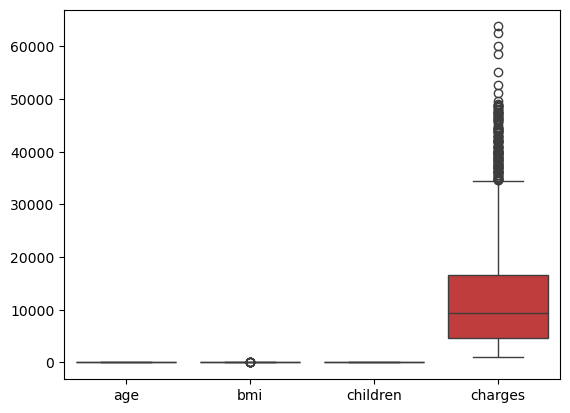

In [10]:
# view Box plots for numeric data. Charges range is too large, so we need to plot each box plot separately.
sns.boxplot(df)
plt.show()

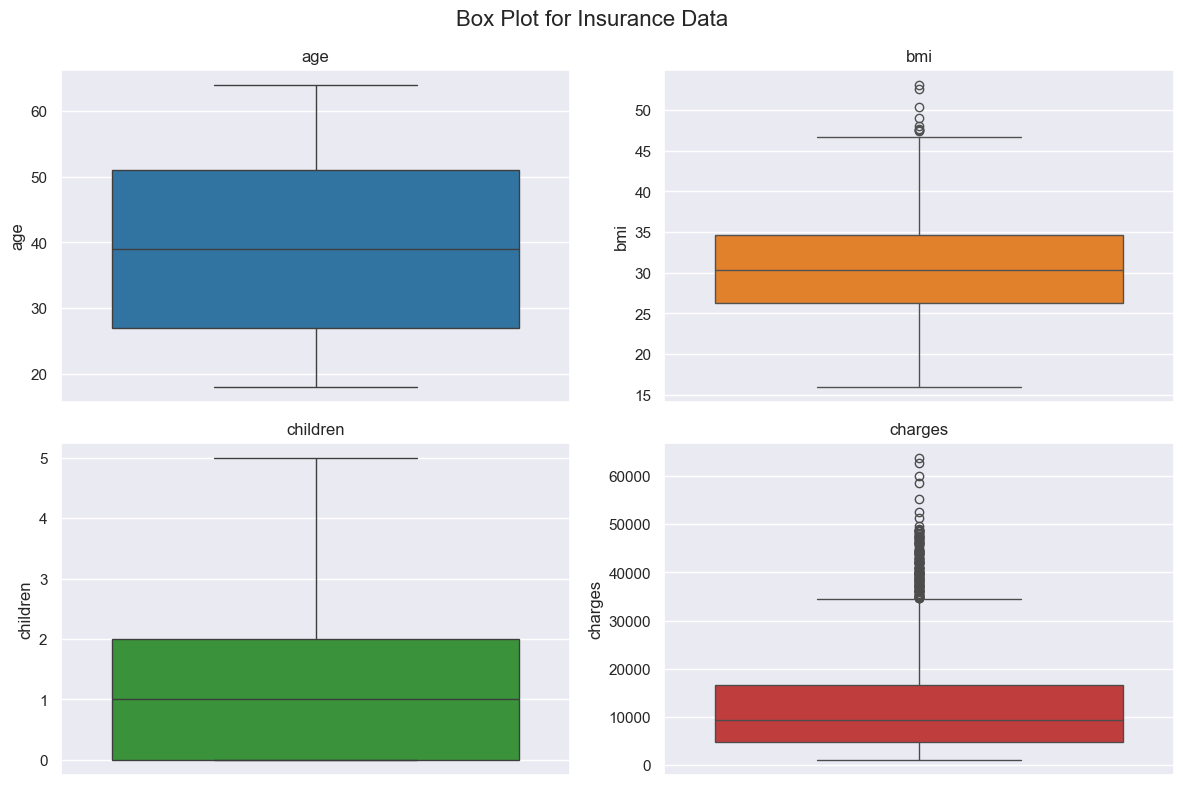

In [11]:
# Create Boxplots

color_pal = sns.color_palette()
# Set figure size
sns.set(rc={'figure.figsize': (12.0, 8.0)})

columns = ['age', 'bmi', 'children', 'charges']

# Number of plots and setup grid layout
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed = (4 + 2 - 1) // 2 = 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(12, 8))

#print(axes)
# Flatten axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each column
for i, column in enumerate(columns):
    sns.boxplot(y=df[column], ax=axes[i], color=color_pal[i])
    axes[i].set_title(column)

plt.suptitle('Box Plot for Insurance Data', fontsize=16)

# Delete any unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### Notice charges have some outliers to investigate. The same for bmi. The average age is 39 as was seen before.

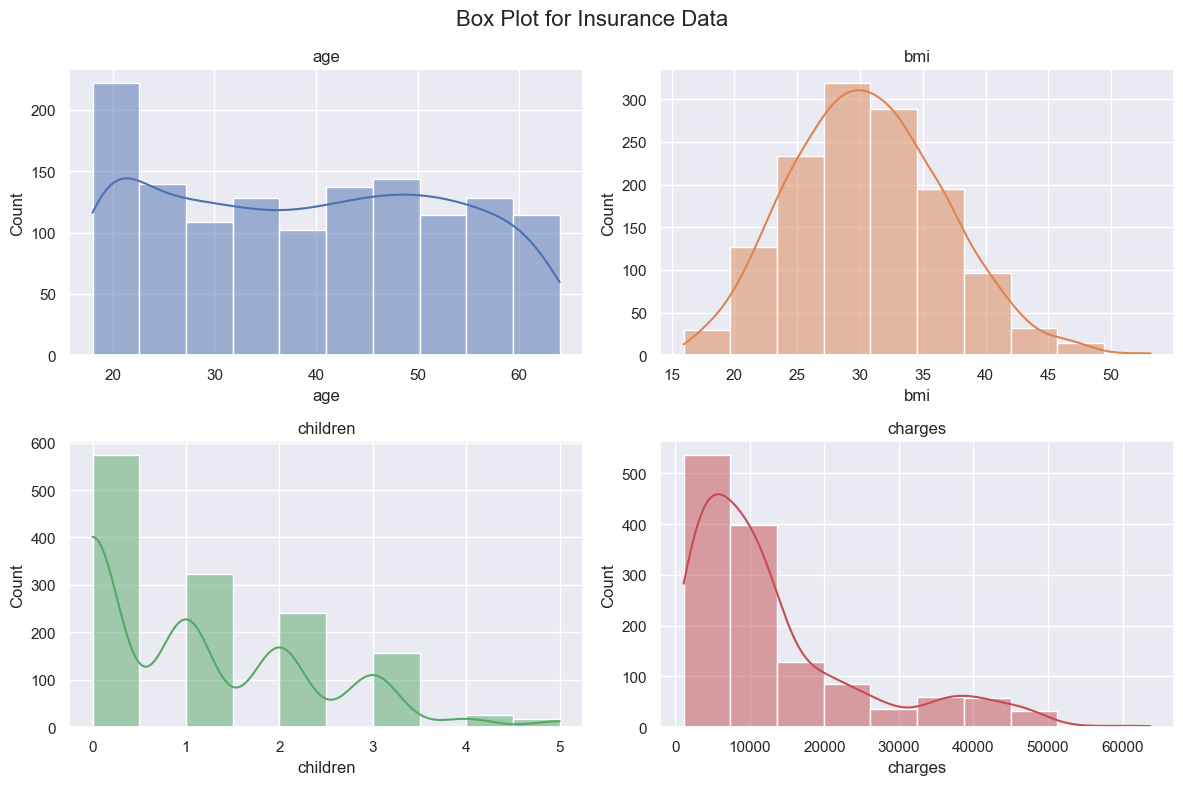

In [12]:
# We can use the same idea for the plots above and create histogram with kde plot to see distribution
# This is some repeating code, so we can put this in a function to be able to create each. I will leave as is for now for simplicity.
color_pal = sns.color_palette()
# Set figure size
sns.set(rc={'figure.figsize': (12.0, 8.0)})

columns = ['age', 'bmi', 'children', 'charges']

# Number of plots and setup grid layout
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed = (4 + 2 - 1) // 2 = 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=False, figsize=(12, 8))

#print(axes)
# Flatten axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each column
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, bins=10, ax=axes[i], color=color_pal[i])
    axes[i].set_title(column)

plt.suptitle('Box Plot for Insurance Data', fontsize=16)

# Delete any unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### BMI is normally distributed as expected. The Age range basically from 20-60 so distribution is ok. There are many persons without children. The charges are skewed to the right. The majority of charges are in the lower range and that is normal based on the type of data. There are a few high charges and we saw that before in our boxplots.

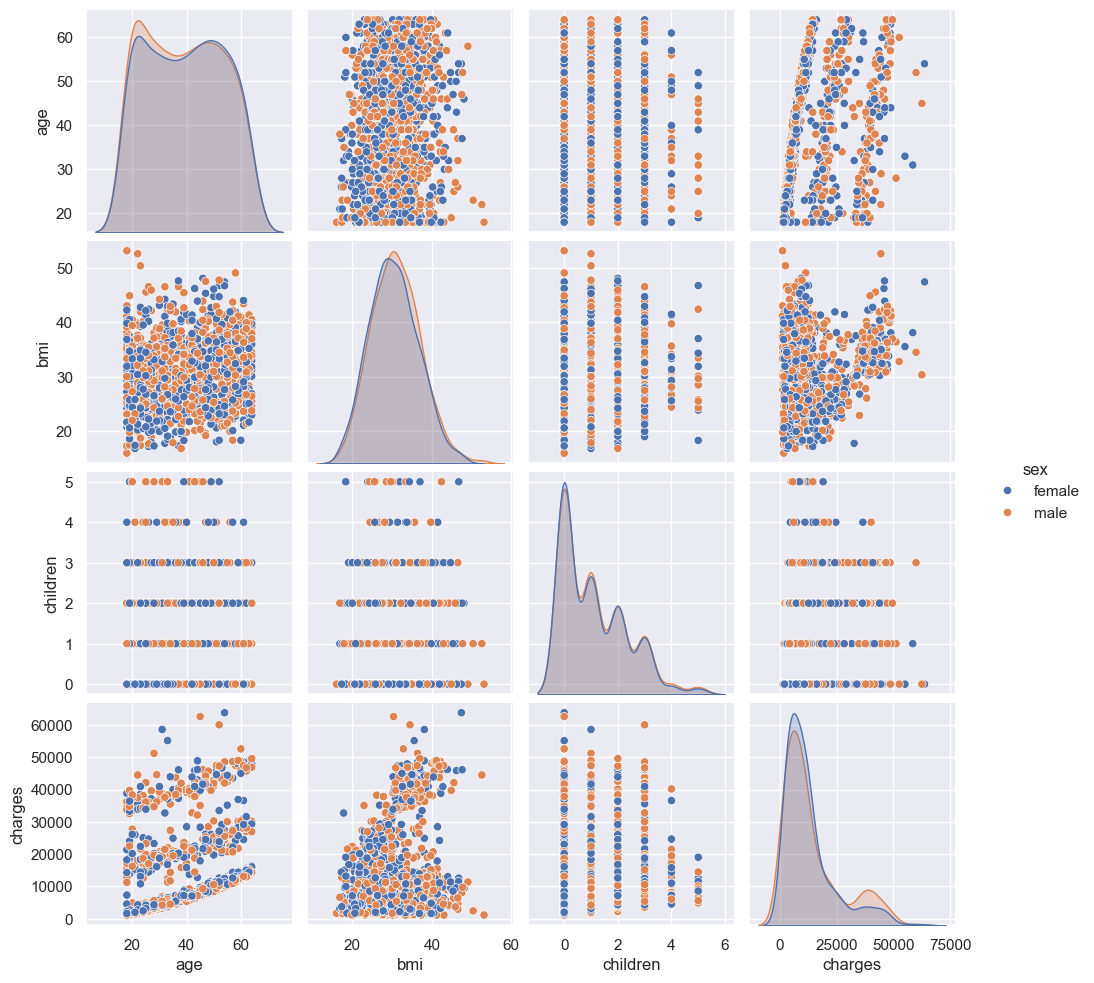

In [13]:
# Let's do a pairplot and color by sex
sns.pairplot(df, hue='sex')
plt.show()

##### There seems to be an interesting relatinship between age and charges and bmi and charges. There seems to be some linear relationship which suggest that a regression model might give some results. We will try other models too. I cannot see a clear distinction among the two sexes. Let us view a heatmap to with values to get a better understanding of these correlations.

In [14]:
# View correlation with heatmap
# Calculate Correlation first
df_corr = df[columns].corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


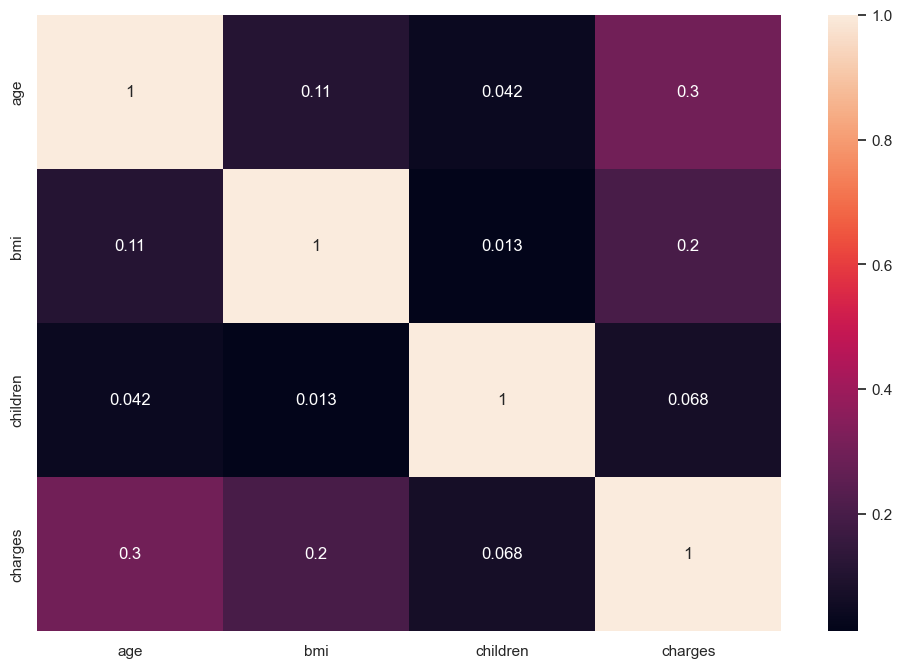

In [15]:
# Use heatmap to visualize correlation
sns.heatmap(df_corr, annot=True)
plt.show()

##### We see the relationships as described above, there are weak and also positive.

### 6. Analyze the Data
- Apply statistical methods/tests here to extract insights

In [16]:
from scipy import stats
# Apply Pearson Correlation coefficient to see if there is any statistical significance between bmi and charges and age and charges
# HO: There is no correlation (correlation coefficient is 0)
# H1: There is a non zero correlation

pearson_coef, p_value = stats.pearsonr(df['bmi'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

# Make decision
alpha = 0.005

if p_value <= alpha:
    print("Reject HO: There is a non zero correlation")
else:
    print("Fail to reject HO: There is no correlation")

The Pearson Correlation Coefficient is 0.19834096883362887  with a P-value of P = 2.459085535116766e-13
Reject HO: There is a non zero correlation


### 7. Summarize Findings
**Results:** The dataset consists of 1,338 rows and 7 columns, with no missing values or significant duplicates. The data types are appropriate for the analysis. BMI is normally distributed, as expected, and the age range spans from 20 to 60, indicating a reasonable distribution. A notable portion of the population has no children. The distribution of charges is right-skewed, with the majority of values falling within the lower range, which is typical for this type of data. There are a few high charges, but this is consistent with earlier observations in the boxplots and is often  normal.

There appears to be a notable relationship between age and charges, as well as between BMI and charges, suggesting a potential linear relationship. This implies that a regression model could yield useful results. No clear distinction between the two sexes is observed. 

Using Pearson's correlation coefficient, we found that the p-values for the relationships between BMI and charges, as well as age and charges, were both below the 0.05 threshold, leading us to reject the null hypothesis (H0: There is no correlation) for these variables.

## ___ Predictive Analysis and Machine Learning ___

### 8. Feature Engineering
- Check if you need new features that you can get externally or combining existing features


In [17]:
# Check if you need new features that you can get externally or combining existing features
# For simplicity we will add an extra feature age_range, that adds categorical data for specified age range
# 0-18: Bin 0 (Under 18)
# 18-30: Bin 1
# 31-50: Bin 2
# 51-70: Bin 3
# Above 70
# Define age bins and labels
bins = [0, 18, 30, 50, 70, float('inf')]  # Age ranges. Use float('inf') so that we don't have to manually set upperbound
labels = [0, 1, 2, 3, 4]  # Corresponding labels
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False ) # right=False to get distinct ranges, no overlaps
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


### 9. Data Splitting
-  Create Train, Test and Validation Sets using train_test_split() from sklearn.model_selection or you can do it manually using slicing

In [18]:
# Create variables for our features and Target
FEATURES = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_range']
TARGET = 'charges'

X = df[FEATURES]
y = df[TARGET]

In [19]:
# Split into Features and Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# View the size of splits
print(f'Data Shape: {df.shape}')
print(f'Train Data Shape: {X_train.shape}')
print(f'Test Data Shape: {X_test.shape}')

Data Shape: (1338, 8)
Train Data Shape: (1070, 7)
Test Data Shape: (268, 7)


### 10. Scaling and Encoding (NB: Tree-based models do not require scaling)
- Normalize (numerical), scale (numeric), encode(categorical) features. OneHotEncoder for nominal and LabelEncoder for ordinal

In [21]:
# Normalize and Encode the data
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat_nom', OneHotEncoder(), ['sex', 'smoker', 'region']),
        ('cat_ord', OrdinalEncoder(), ['age_range'])
    ],
    remainder='passthrough'
)

### 11. Model Selection
- Choose model(s) based on problem (regression, classification)
- Explore using a GridSearch approach using GridSearchCV from sklearn.model_selection 

In [22]:
# Add models to test
models = []
models.append(('LR', LinearRegression()))
models.append(('KR', KernelRidge()))
models.append(('SVR', SVR()))


### 12. Model Training
- Train on training set
- Use cross-validation by using KFold from sklearn.model_selection

In [23]:
# Using KFold to evaluate models
def RMSE(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

def my_scorer():
    return make_scorer(RMSE, greater_is_better=False) # If using R2, you would need to change this to True

results = {}

for name, model in models:
    # Create a pipeline that first applies preprocessing and then fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    score_results = model_selection.cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=my_scorer())
    results[name] = abs(score_results.mean())

for key, value in results.items():
    print(f"{key} => {value}")

# Sort and print the models by their MSE performance (lower MSE is better)
sorted_results = dict(sorted(results.items(), key=lambda item: item[1]))
print("\nSorted Models (Lower RMSE is Better):")
for key, value in sorted_results.items():
    print(f"{key} => MSE: {value:.6f}")


LR => 6135.912678882409
KR => 6136.46623117466
SVR => 12558.969016331775

Sorted Models (Lower RMSE is Better):
LR => MSE: 6135.912679
KR => MSE: 6136.466231
SVR => MSE: 12558.969016


### 13. Hyperparameter Tuning
- Optimize parameter using strategies like Grid Search

In [24]:
# Ignore warnings from here. This will take a while
import warnings
warnings.filterwarnings('ignore')

# LR and KR are close. We don't have hyperparameters to finetune for LR
# Use GridSearch with KR and see if we can finetune the parameters and then compare both
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KernelRidge())
])

# Hyperparameter grid for the KernelRidge model.
# Look up the documentation to decide on parameters.
param_grid = {
    'model__alpha': [1.0, 2.0, 2.5, 1.5],
    'model__kernel': ['linear', 'sigmoid', 'rbf', 'poly'],
    'model__gamma': [None, 1, 0.1],
    'model__degree': [1, 2, 3],
    'model__coef0': [0.0, 0.1, 0.5]
}

gridSearch = GridSearchCV(pipeline, param_grid, cv=10, scoring=my_scorer())
gridSearch.fit(X_train, y_train)
# Look for the best score
best_score = abs(gridSearch.best_score_) # Since my_scorer() uses greater_is_better=False. The negative version is being presented here
print(f"The best score is: {best_score}") 
best_params = gridSearch.best_params_
print(f"The best params are: {best_params}") 
# Select the best estimator with best params for Kernel Ridge. This will be used below for model evaluation
kr = gridSearch.best_estimator_

The best score is: 4928.332175217688
The best params are: {'model__alpha': 2.5, 'model__coef0': 0.5, 'model__degree': 2, 'model__gamma': 1, 'model__kernel': 'poly'}


### 14. Model Evaluation
- Evaluate model on test set
- Use metrics like RMSE, MSE, MAE for regression models or F1  Score and Accuracy for classification models

In [25]:
# We have to fit the LR model first as we didn't do that above. The Kernel Ridgle kr was already created above
pipeline_lr = Pipeline(steps=[
     ('preprocessor', preprocessor),
     ('model', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat_nom', OneHotEncoder(),
                                                  ['sex', 'smoker', 'region']),
                                                 ('cat_ord', OrdinalEncoder(),
                                                  ['age_range'])])),
                ('model', LinearRegression())])

In [26]:
# Make predictions with LR and KR
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_kr = kr.predict(X_test)

print(f"Score for LR: {RMSE(y_test, y_pred_lr)}")
print(f"Score for KR: {RMSE(y_test, y_pred_kr)}")

Score for LR: 5801.634782167118
Score for KR: 4531.34843081154


##### It is clearly observed that Kernel Ridge is outperforming Linear Regression.

In [27]:
# Let us visualize the Actual Values vs Predicted for LR and use a line of equality to see how close the predictions are to this line.
# Define a function so we don't end up duplicating code
def plot_scatter(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted for {model_name} ')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()

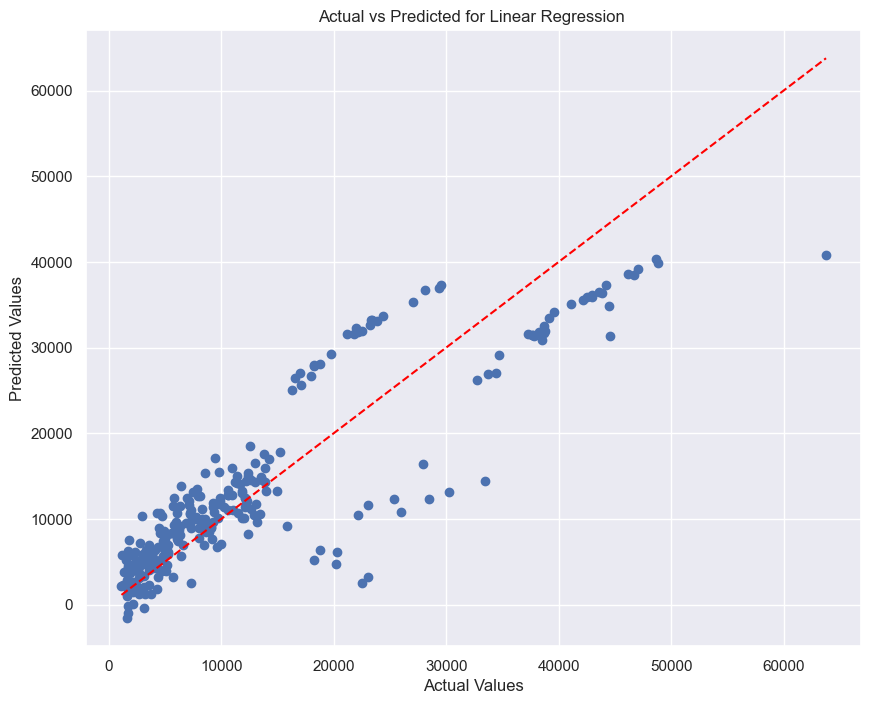

In [28]:
# Plot for Linear Regression
plot_scatter(y_test, y_pred_lr, "Linear Regression")

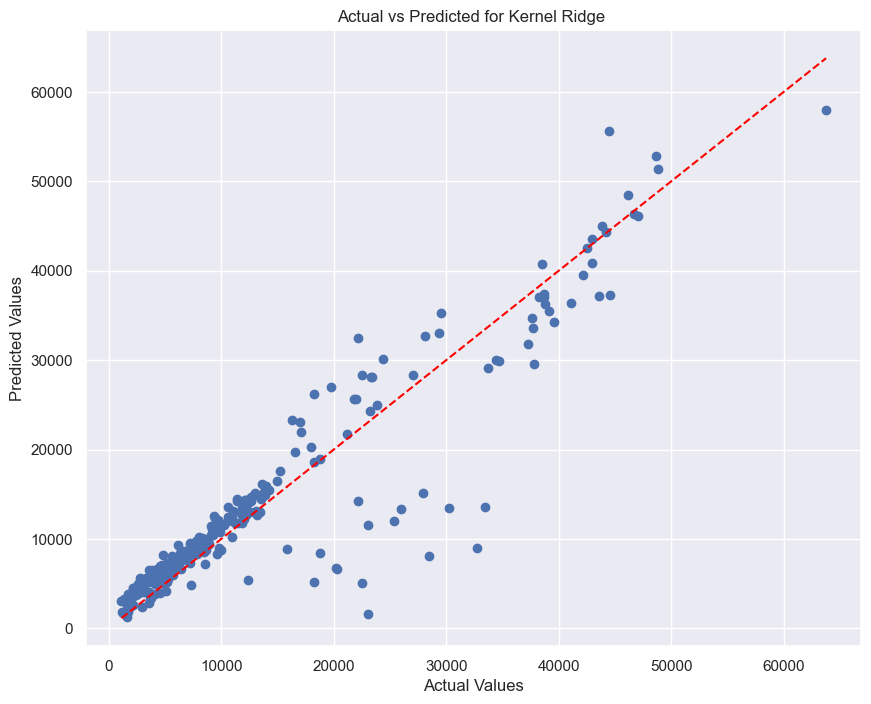

In [29]:
# Plot for Kernel Ridge
plot_scatter(y_test, y_pred_kr, "Kernel Ridge")

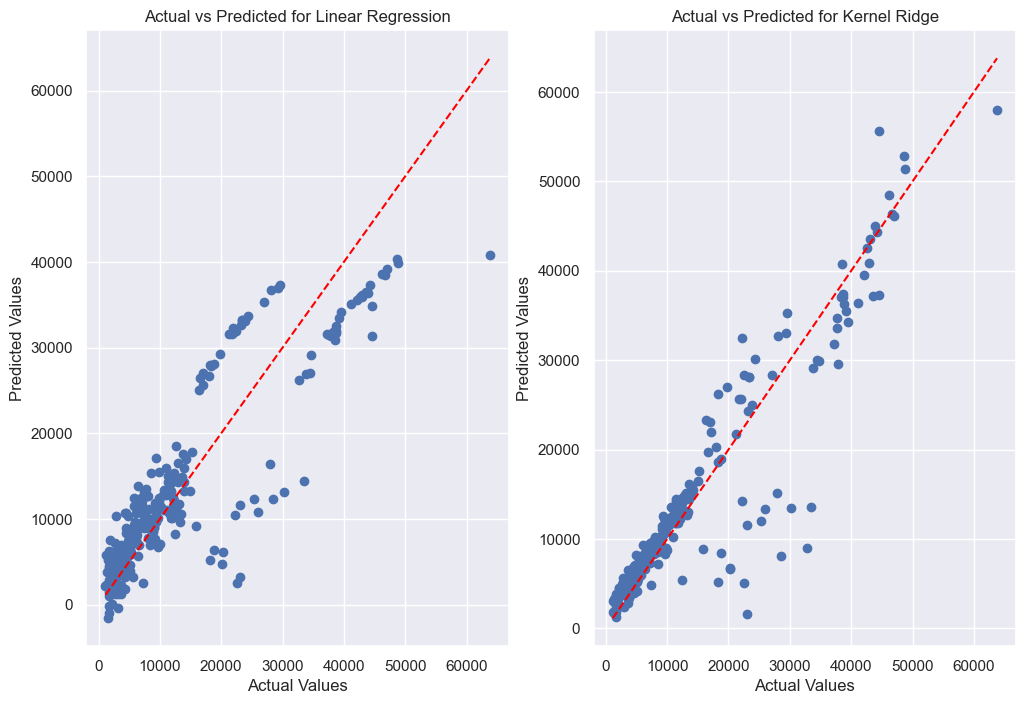

In [30]:
# The plots can be also lined up beside each other using subplots.
 
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].scatter(y_test, y_pred_lr)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Actual vs Predicted for Linear Regression')
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[1].scatter(y_test, y_pred_kr)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Actual vs Predicted for Kernel Ridge')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### 15. Conclusion
- Highlight main insights and key results of prediction and evaluation
- Discuss limitations

In this analysis, the aim was to predict insurance charges based on several attributes of insured individuals, including age, sex, BMI, number of children, smoking status, and region. The goal was to assess the performance of three regression machine learning models—Linear Regression (LR), Kernel Ridge (KR) and Support Vector Regression (SVR)—by comparing their predicted values to the actual charges in the test dataset.

The results showed that the LR and KR model provided reasonable approximations, with deviations from the line of equality being noticeable. This visual inspection suggests that while the models capture the general trend of the data, there is still room for improvement, especially in terms of reducing prediction errors.

The use of Kernel Ridge regression, with its more flexible non-linear approach, performed better than Linear Regression.

Overall, the notebook demonstrates a basic approach to training and evaluating regression models on a dataset of insurance charges. Future work could involve testing additional models including using Deep Learning models, and exploring feature engineering to further improve prediction accuracy. 

### 16. Save Model for Deployment
- Save model, integrate with existing sytems and monitor performance.

In [31]:
# Save model
import pickle

with open('kr_model.pkl', 'wb') as file:
    pickle.dump(kr, file)